<a href="https://colab.research.google.com/github/Govindu-Sathruwan/Octave-DSPL/blob/main/Octave_DSPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Test CSV**

## **Data Exploration**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test = pd.read_csv("/content/test.csv")
test

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,batticaloa,2686.5,3582,12537
1,10089,batticaloa,1717.56,2576.34,9446.58
2,38329,batticaloa,854.04,1242.24,5201.88
3,11376,batticaloa,1638.12,2320.67,9282.68
4,12410,batticaloa,1039.09,1518.67,5435.24
...,...,...,...,...,...
40744,33698,Wattala,3916.48,4161.26,3916.48
40745,4185,Wattala,3191.92,3004.16,3098.04
40746,28664,Wattala,3838.6,3951.5,Three Thousand seven hundread ruppees
40747,11874,Wattala,4313.76,4183.04,4313.76


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
test.describe()

,Customer_ID
count,40749.000000
mean,20375.000000
std,11763.367396
min,1.000000
25%,10188.000000
50%,20375.000000
75%,30562.000000
max,40749.000000


In [ ]:
unique_values_test = test.apply(pd.Series.unique)
print(unique_values_test)

Customer_ID     [33574, 10089, 38329, 11376, 12410, 826, 10364...
outlet_city     [batticaloa, Batticaloa, Colombo, Dehiwala-Mou...
luxury_sales    [2686.5, 1717.56, 854.04, 1638.12, 1039.09, 12...
fresh_sales     [3582, 2576.34, 1242.24, 2320.67, 1518.67, 149...
dry_sales       [12537, 9446.58, 5201.88, 9282.68, 5435.24, 68...
dtype: object


In [ ]:
missing_values = test.isnull().sum()
print(missing_values)

Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64


In [ ]:
num_duplicates1 = test.duplicated().sum()
num_duplicates1

0

## **EDA**

### **UNIVARIATE**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
test['luxury_sales'] = pd.to_numeric(test['luxury_sales'], errors='coerce').astype(float)

sns.set_style("whitegrid")
test['luxury_sales'] = pd.to_numeric(test['luxury_sales'], errors='coerce').astype(float)

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(test['luxury_sales'], bins=50, kde=True)
plt.title("Distribution of Luxury Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='outlet_city', data=test, order=test['outlet_city'].value_counts().index)
plt.title('Distribution of Outlet Cities')
plt.xlabel('Outlet City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
test['luxury_sales'] = pd.to_numeric(test['luxury_sales'], errors='coerce').astype(float)

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(test["luxury_sales"], bins=50, kde=True)
plt.title("Distribution of Luxury Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
test['fresh_sales'] = pd.to_numeric(test['fresh_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(test['fresh_sales'], bins=50, kde=True, color='orange')
plt.title("Distribution of Fresh Sales")
plt.xlabel("Fresh Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
test['dry_sales'] = pd.to_numeric(test['dry_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(test['dry_sales'], bins=50, kde=True, color='red')
plt.title("Distribution of Dry Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Frequency")
plt.show()

### **MULTIVARIATE**

In [ ]:
test_grouped = test.groupby("outlet_city")[["luxury_sales", "fresh_sales", "dry_sales"]].mean(numeric_only=True).reset_index()
test_grouped.plot(x="outlet_city", kind="bar", figsize=(12,6))
plt.title("Average Sales by Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(["Luxury Sales", "Fresh Sales", "Dry Sales"])
plt.show()

In [ ]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test, x="luxury_sales", y="fresh_sales", alpha=0.7)
plt.title("Luxury Sales vs. Fresh Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Fresh Sales")
plt.show()

In [ ]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test, x="dry_sales", y="fresh_sales", alpha=0.7)
plt.title("Dry Sales vs. Fresh Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Fresh Sales")
plt.show()

In [ ]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=test, x="luxury_sales", y="dry_sales", alpha=0.7)
plt.title("Luxury Sales vs. Dry Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Dry Sales")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
sns.boxplot(x="outlet_city", y="luxury_sales", data=test)
plt.xlabel("Outlet City")
plt.ylabel("Luxury Sales")
plt.xticks(rotation=45)
plt.title("Luxury Sales Distribution by Outlet City")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
sns.boxplot(x="outlet_city", y="fresh_sales", data=test)
plt.xlabel("Outlet City")
plt.ylabel("Fresh Sales")
plt.xticks(rotation=45)
plt.title("Fresh Sales Distribution by Outlet City")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
sns.boxplot(x="outlet_city", y="dry_sales", data=test)
plt.xlabel("Outlet City")
plt.ylabel("Dry Sales")
plt.xticks(rotation=45)
plt.title("Dry Sales Distribution by Outlet City")
plt.show()

In [ ]:
correlation_matrix = test.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Data Cleaning

In [ ]:
# Check the shape of the data
test.shape

(40749, 5)

In [ ]:
# Checking the datatypes
test.dtypes

,0
Customer_ID,int64
outlet_city,object
luxury_sales,object
fresh_sales,object
dry_sales,object


In [ ]:
# Check for number of missing values in each coulmn
test.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0


In [ ]:
# change the object data types to float for sales features
test['fresh_sales'] = pd.to_numeric(test['fresh_sales'].str.replace(',', '',regex=True), errors='coerce')
test['luxury_sales'] = pd.to_numeric(test['luxury_sales'].str.replace(',', '',regex=True), errors='coerce')
test['dry_sales'] = pd.to_numeric(test['dry_sales'].str.replace(',', '',regex=True), errors='coerce')

In [ ]:
# Check for number of missing values in each coulmn
test.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,2
fresh_sales,1
dry_sales,1


In [ ]:
# Total number of rows with missing values
test.isnull().any(axis=1).sum()

4

In [ ]:
# display the rows with null values
test[test.isnull().any(axis=1)]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
6,10364,batticaloa,NaN,914.40,3352.80
6299,4059,Anuradhapura,NaN,1548.69,5705.70
13949,28662,Jaffna,2195.84,NaN,1509.64
40746,28664,Wattala,3838.60,3951.50,NaN


In [ ]:
# show the raw data rows with these customer Ids
test_check = pd.read_csv('/content/drive/MyDrive/Octave DSPL/test.csv')
test_check[test_check['Customer_ID'].isin([10364, 4059, 28662, 28664])]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
6,10364,batticaloa,Seven Hundread and sixty Ruppees,914.4,3352.8
6299,4059,Anuradhapura,Eight Hundread and fifteen ruppes,1548.69,5705.7
13949,28662,Jaffna,2195.84,Nine thousand ruppess,1509.64
40746,28664,Wattala,3838.6,3951.5,Three Thousand seven hundread ruppees


In [ ]:
# replace the values in words with the correct values
test.loc[test['Customer_ID'] == 10364, 'luxury_sales'] = 760
test.loc[test['Customer_ID'] == 4059, 'luxury_sales'] = 815
test.loc[test['Customer_ID'] == 28662, 'fresh_sales'] = 9000
test.loc[test['Customer_ID'] == 28664, 'dry_sales'] = 3700

In [ ]:
# Total number of rows with missing values
test.isnull().any(axis=1).sum()

0

In [ ]:
# change the customer ID feature to string datatype
test['Customer_ID'] = test['Customer_ID'].astype(str)
# Check data types
test.dtypes

,0
Customer_ID,object
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64


In [ ]:
# check the unique values in the outlet city fearture
test.outlet_city.unique()

array(['batticaloa', 'Batticaloa', 'Colombo', 'Dehiwala-Mount Lavinia',
       'Anuradhapura', 'Galle', 'Gampaha', 'Homagama', 'Jaffna',
       'Kaduwela', 'Kalmunai', 'kalmunai', 'Kandy', 'Katunayake',
       'Kelaniya', 'Madawachiya', 'Kotte', 'Moratuwa', 'MoraTuwa',
       'Negombo', 'Nuwara Eliya', 'Panadura', 'Peliyagoda', 'PeliyagodA',
       'Trincomale', 'Trincomalee', 'Wattala'], dtype=object)

In [ ]:
test.outlet_city.nunique()

27

In [ ]:
# Correcting the misspellings
test.loc[test['outlet_city'] == 'batticaloa', 'outlet_city'] = 'Batticaloa'
test.loc[test['outlet_city'] == 'kalmunai', 'outlet_city'] = 'Kalmunai'
test.loc[test['outlet_city'] == 'MoraTuwa', 'outlet_city'] = 'Moratuwa'
test.loc[test['outlet_city'] == 'PeliyagodA', 'outlet_city'] = 'Peliyagoda'
test.loc[test['outlet_city'] == 'Trincomale', 'outlet_city'] = 'Trincomalee'

In [ ]:
# check the unique values in the outlet city fearture
test.outlet_city.unique()

array(['Batticaloa', 'Colombo', 'Dehiwala-Mount Lavinia', 'Anuradhapura',
       'Galle', 'Gampaha', 'Homagama', 'Jaffna', 'Kaduwela', 'Kalmunai',
       'Kandy', 'Katunayake', 'Kelaniya', 'Madawachiya', 'Kotte',
       'Moratuwa', 'Negombo', 'Nuwara Eliya', 'Panadura', 'Peliyagoda',
       'Trincomalee', 'Wattala'], dtype=object)

In [ ]:
dft=test[(test['outlet_city']=='Anuradhapura') | (test['outlet_city']=='Madawachiya')]
dft

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
6192,10321,Anuradhapura,1708.80,3246.72,11107.20
6193,16217,Anuradhapura,1810.50,3077.85,12673.50
6194,22360,Anuradhapura,1228.78,1755.40,5880.59
6195,11471,Anuradhapura,1642.55,2021.60,8339.10
6196,6151,Anuradhapura,1119.16,1358.98,5515.86
...,...,...,...,...,...
26509,18853,Madawachiya,1629.42,8272.44,2130.78
26510,34070,Madawachiya,975.45,4226.95,1170.54
26511,26102,Madawachiya,741.73,4585.24,1348.60
26512,36534,Madawachiya,1417.32,7913.37,2125.98


In [ ]:
dft.shape

(3144, 5)

<Axes: xlabel='dry_sales'>

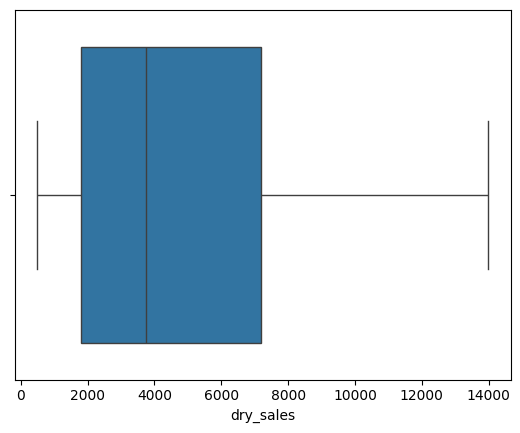

In [ ]:
# box plot for the dry sales
sns.boxplot(x=test['dry_sales'])

<Axes: xlabel='fresh_sales'>

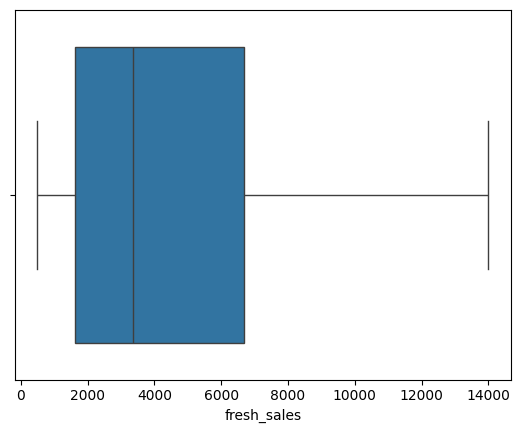

In [ ]:
# box plot for the fresh sales
sns.boxplot(x=test['fresh_sales'])

<Axes: xlabel='luxury_sales'>

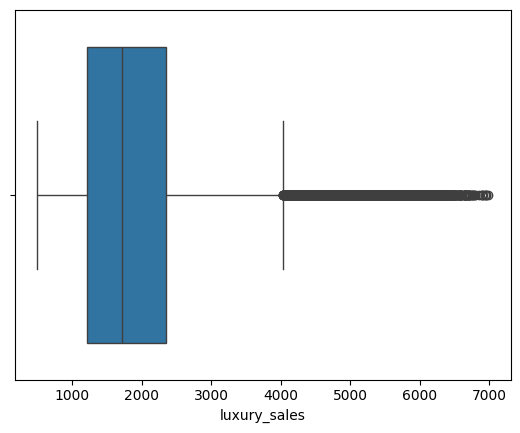

In [ ]:
# box plot for the luxury sales
sns.boxplot(x=test['luxury_sales'])

# **Train CSV**

## **Data Exploration**

In [ ]:
train = pd.read_csv("/content/traincsv.csv")

train

<ipython-input-9-5d7986f7dcc2>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/traincsv.csv")


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4
...,...,...,...,...,...,...
774150,10197979.0,Gampaha,3893.4,3893.4,3448.44,3
774151,10494575.0,Katunayake,6095.86,5557.99,6275.15,3
774152,10565682.0,Colombo,5121.42,4820.16,4669.53,3
774153,10351977.0,Kandy,6311.76,6311.76,5940.48,3


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [ ]:
train.describe()

,Customer_ID
count,7.741530e+05
mean,1.038708e+07
std,2.234795e+05
min,1.000000e+07
25%,1.019354e+07
50%,1.038708e+07
75%,1.058062e+07
max,1.077415e+07


In [ ]:
train.shape

(774155, 6)

In [ ]:
unique_values_train = train.apply(pd.Series.unique)
print(unique_values_train)

Customer_ID         [10493832.0, 10178643.0, 10513916.0, 10334589....
outlet_city         [Kelaniya, Moratuwa, Wattala, Homagama, Dehiwa...
luxury_sales        [1209.6, 1590.12, 2288.88, 2274.94, 2345.49, 1...
fresh_sales         [756.0, 1060.08, 1481.04, 1739.66, 2069.55, 91...
dry_sales           [5292.0, 6007.12, 9155.52, 9099.76, 9243.99, 5...
cluster_catgeory    [4, 1, 99, 2, 5, 3, 6, 6\, 4, 2, 1, 95, 3, 98,...
dtype: object


In [ ]:
missing_values_train = train.isnull().sum()
print(missing_values_train)

Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64


In [ ]:
num_duplicates_train = train.duplicated().sum()
num_duplicates_train

0

In [ ]:
train.shape

(774155, 6)

## **EDA**

### **UNIVARIATE**

In [ ]:
# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='outlet_city', data=train, order=train['outlet_city'].value_counts().index)
plt.title('Distribution of Outlet Cities')
plt.xlabel('Outlet City')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce').astype(float)

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(train["luxury_sales"], bins=50, kde=True)
plt.title("Distribution of Luxury Sales")
plt.xlabel("Luxury Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(train['fresh_sales'], bins=50, kde=True, color='orange')
plt.title("Distribution of Fresh Sales")
plt.xlabel("Fresh Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
train['dry_sales'] = pd.to_numeric(train['dry_sales'], errors='coerce').astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(train['dry_sales'], bins=50, kde=True, color='red')
plt.title("Distribution of Dry Sales")
plt.xlabel("Dry Sales")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Bar Plot for "cluster" column
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_catgeory', data=train, order=train['cluster_catgeory'].value_counts().index, color='lightgreen')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster_catgeory', data=train)
plt.title("Frequency Distribution of Cluster Categories")
plt.xlabel("Cluster Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **Multivariate**


In [ ]:
train_grouped = train.groupby("outlet_city")[["luxury_sales", "fresh_sales", "dry_sales"]].mean(numeric_only=True).reset_index()
train_grouped.plot(x="outlet_city", kind="bar", figsize=(12,6))
plt.title("Average Sales by Outlet City")
plt.xlabel("Outlet City")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.legend(["Luxury Sales", "Fresh Sales", "Dry Sales"])
plt.show()

In [ ]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x="luxury_sales", y="fresh_sales", hue="cluster_catgeory", alpha=0.7)
plt.title("Luxury Sales vs. Fresh Sales (Colored by Cluster)")
plt.xlabel("Luxury Sales")
plt.ylabel("Fresh Sales")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x="dry_sales", y="fresh_sales", hue="cluster_catgeory", alpha=0.7)
plt.title("Dry Sales vs. Fresh Sales (Colored by Cluster)")
plt.xlabel("Dry Sales")
plt.ylabel("Fresh Sales")
plt.legend(title="Cluster")
plt.show()

In [ ]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x="luxury_sales", y="dry_sales", hue="cluster_catgeory", alpha=0.7)
plt.legend(title="Cluster")
plt.title("Luxury Sales vs. Dry Sales (Colored by Cluster)")
plt.xlabel("Luxury Sales")
plt.ylabel("Dry Sales")
plt.legend(title="Cluster")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x="cluster_catgeory", y="fresh_sales")
plt.title("Fresh Sales Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Fresh Sales")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x="cluster_catgeory", y="dry_sales")
plt.title("Dry Sales Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Dry Sales")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x="cluster_catgeory", y="luxury_sales")
plt.title("Luxury Sales Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Luxury Sales")
plt.show()

In [ ]:
correlation_matrix = train.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Data Cleaning

In [ ]:
# shape of the dataframe
train.shape

(774155, 6)

In [ ]:
# Check data types
train.dtypes

,0
Customer_ID,float64
outlet_city,object
luxury_sales,object
fresh_sales,object
dry_sales,object
cluster_catgeory,object


In [ ]:
# Check for number of missing values in each coulmn
train.isnull().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,35
fresh_sales,41
dry_sales,30
cluster_catgeory,1


In [ ]:
# change the object data types to float for sales features
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'].str.replace(',', '',regex=True), errors='coerce')
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'].str.replace(',', '',regex=True), errors='coerce')
train['dry_sales'] = pd.to_numeric(train['dry_sales'].str.replace(',', '',regex=True), errors='coerce')

In [ ]:
# Check for number of missing values in each coulmn
train.isnull().sum()

,0
Customer_ID,2
outlet_city,2
luxury_sales,45
fresh_sales,50
dry_sales,38
cluster_catgeory,1


In [ ]:
# Total number of rows with missing values
train.isnull().any(axis=1).sum()

116

In [ ]:
# display the rows with null values
train[train.isnull().any(axis=1)]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
4234,10101878.0,Dehiwala-Mount Lavinia,NaN,1686.36,9556.04,4
4326,10531406.0,Kaduwela,925.80,NaN,4011.80,4
4327,10311229.0,Panadura,2374.00,NaN,7715.50,4
4333,10361798.0,Kotte,NaN,NaN,6589.44,4
4929,10414692.0,Kaduwela,1780.80,NaN,NaN,4
...,...,...,...,...,...,...
754304,10006333.0,Batticaloa,3932.66,NaN,4186.38,3
754306,10726566.0,Jaffna,2728.95,2417.07,NaN,3
755630,10537627.0,Gampaha,NaN,5371.37,5717.91,3
765777,10499622.0,Katunayake,5315.57,NaN,5829.98,3


In [ ]:
# display the tuples with cluster category null
train[train['cluster_catgeory'].isnull()]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
555560,10158111.0,Kalmunai,1730.52,2451.57,9662.07,NaN


In [ ]:
# display the tuples with luxury sales null
train[train['luxury_sales'].isnull()]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
4234,10101878.0,Dehiwala-Mount Lavinia,NaN,1686.36,9556.04,4
4333,10361798.0,Kotte,NaN,NaN,6589.44,4
5375,10556752.0,Moratuwa,NaN,1328.88,7751.80,4
5408,10321643.0,Peliyagoda,NaN,NaN,3630.09,4
78367,10424117.0,Kotte,NaN,NaN,3472.08,4
78380,10343473.0,Peliyagoda,NaN,NaN,7337.40,4
80043,10774052.0,Kelaniya,NaN,1118.00,5934.00,4
174628,10207785.0,Kelaniya,NaN,9322.50,2683.75,2
175278,10347733.0,Peliyagoda,NaN,4286.28,NaN,2
296621,10215937.0,Panadura,NaN,8155.11,NaN,2


In [ ]:
# display the tuples with fresh sales null
train[train['fresh_sales'].isnull()]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
4326,10531406.0,Kaduwela,925.80,NaN,4011.80,4
4327,10311229.0,Panadura,2374.00,NaN,7715.50,4
4333,10361798.0,Kotte,NaN,NaN,6589.44,4
4929,10414692.0,Kaduwela,1780.80,NaN,NaN,4
5379,10600529.0,Wattala,1405.40,NaN,4637.82,4
5403,10484539.0,Peliyagoda,1167.20,NaN,4085.20,4
5408,10321643.0,Peliyagoda,NaN,NaN,3630.09,4
78367,10424117.0,Kotte,NaN,NaN,3472.08,4
78380,10343473.0,Peliyagoda,NaN,NaN,7337.40,4
78400,10504943.0,Moratuwa,2312.16,NaN,NaN,4


In [ ]:
# display the tuples with dry sales null
train[train['dry_sales'].isnull()]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
4929,10414692.0,Kaduwela,1780.80,NaN,NaN,4
78400,10504943.0,Moratuwa,2312.16,NaN,NaN,4
148029,10190107.0,Dehiwala-Mount Lavinia,931.50,931.50,NaN,4
174631,10273730.0,Homagama,1074.36,5141.58,NaN,2
174720,10039004.0,Kaduwela,944.44,4722.20,NaN,2
175278,10347733.0,Peliyagoda,NaN,4286.28,NaN,2
268571,10047014.0,Panadura,1808.30,NaN,NaN,2
296621,10215937.0,Panadura,NaN,8155.11,NaN,2
327168,10649653.0,Kotte,626.16,3548.24,NaN,2
327169,10737280.0,Nuwara Eliya,820.20,5741.40,NaN,2


In [ ]:
# Calculating the percentage of the missing values
print(train.isnull().sum()/len(train)*100)
print(train.isnull().any(axis=1).sum()/len(train)*100)

Customer_ID         0.000258
outlet_city         0.000258
luxury_sales        0.005813
fresh_sales         0.006459
dry_sales           0.004909
cluster_catgeory    0.000129
dtype: float64
0.014984079415620901


In [ ]:
# since very low percentage & MACR - drop the null rows
train.dropna(inplace=True)
train.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_catgeory,0


In [ ]:
# change the customer ID feature to string datatype
train['Customer_ID'] = train['Customer_ID'].astype(str)
# Check data types
train.dtypes

,0
Customer_ID,object
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_catgeory,object


In [ ]:
# check for duplicates in customer ID
train[train['Customer_ID'].duplicated()]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory


In [ ]:
# Check the unique values in outlet city feature
train['outlet_city'].unique()

array(['Kelaniya', 'Moratuwa', 'Wattala', 'Homagama',
       'Dehiwala-Mount Lavinia', 'Panadura', 'Kaduwela', 'Peliyagoda',
       'Kotte', 'Nuwara Eliya', 'Batticaloa', 'Colombo', 'Jaffna',
       'Gampaha', 'Kalmunai', 'Galle', 'Katunayake', 'Negombo',
       'Trincomalee', 'Kandy'], dtype=object)

In [ ]:
train['outlet_city'].nunique()

20

In [ ]:
# Check the unique values from the cluster category feature
train['cluster_catgeory'].unique()

array(['4', '1', '99', '2', '5', '3', '6', '6\\', '95', '98', '100', '89'],
      dtype=object)

In [ ]:
# Correct the wrong values
train['cluster_catgeory'] = train['cluster_catgeory'].str.replace('6\\', '6')

In [ ]:
# Check the unique values from the cluster category feature
train['cluster_catgeory'].unique()

array(['4', '1', '99', '2', '5', '3', '6', '95', '98', '100', '89'],
      dtype=object)

In [ ]:
# Rows with cluster category 100
train[train['cluster_catgeory'] == "100"]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
555703,10282701.0,Katunayake,678.26,986.56,4131.22,100


In [ ]:
# drop the rows with invalid cluster categories
train = train.drop(train[(train['cluster_catgeory'] == "99") |
                         (train['cluster_catgeory'] == "100" ) |
                          (train['cluster_catgeory'] == "95") |
                           (train['cluster_catgeory'] == "98") |
                            (train['cluster_catgeory'] == "89")].index)

In [ ]:
# Rows with cluster category 100
train[train['cluster_catgeory'] == "100"]

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory


<Axes: xlabel='luxury_sales'>

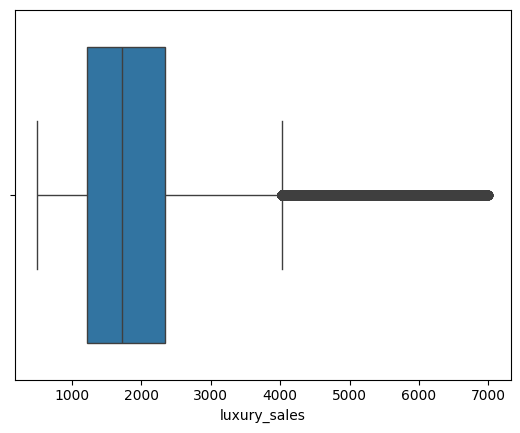

In [ ]:
# box plot for the luxury sales
sns.boxplot(x=train['luxury_sales'])

<Axes: xlabel='fresh_sales'>

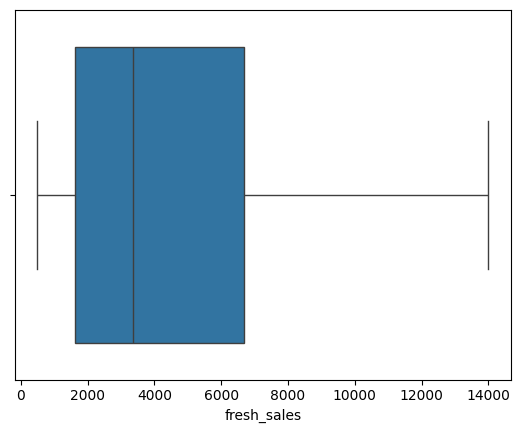

In [ ]:
# box plot for the fresh sales
sns.boxplot(x=train['fresh_sales'])

<Axes: xlabel='dry_sales'>

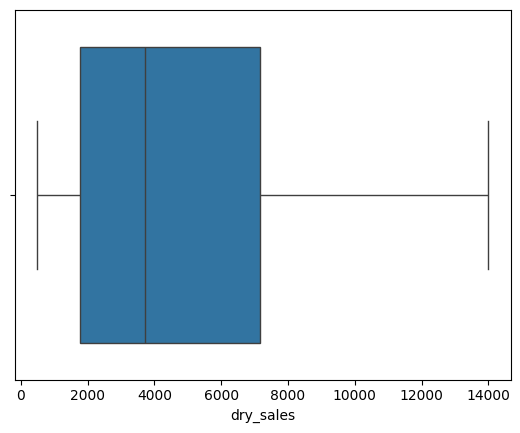

In [ ]:
# box plot for the dry sales
sns.boxplot(x=train['dry_sales'])

In [ ]:
train['luxury_sales'].max()

6999.65